In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
nyc = pd.read_csv("HIV_AIDS_Diagnoses_by_Neighborhood__Sex__and_Race_Ethnicity.csv")
nyc

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,2010,NaN,Greenpoint,Male,Black,6,330.4,0,0,5,275.3
1,2011,NaN,Stapleton - St. George,Female,Native American,0,0,0,0,0,0
2,2010,NaN,Southeast Queens,Male,All,23,25.4,5,21.7,14,15.4
3,2012,NaN,Upper Westside,Female,Unknown,0,0,0,0,0,0
4,2013,NaN,Willowbrook,Male,Unknown,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8971,2021,Staten\nIsland,Willowbrook,Male,Asian/Pacific\nIslander,2,24.2,0,0,0,0
8972,2021,Staten\nIsland,Willowbrook,Male,Black,0,0,0,NaN,0,0
8973,2021,Staten\nIsland,Willowbrook,Male,Latino/Hispanic,1,18.2,0,0,0,0
8974,2021,Staten\nIsland,Willowbrook,Male,Other/Unknown,0,0,0,NaN,1,153


In [3]:
nyc.describe(include = ["O"])


,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
count,6048,8976,8976,8976,8970,8902,8974,7083,8973,8905
unique,6,66,3,11,306,1260,121,305,238,991
top,Brooklyn,All,Male,All,0,0,0,0,0,0
freq,1512,760,3392,1528,3160,3142,5038,3185,3735,3714


In [4]:
nyc.isna().any(axis = 1)


0        True
1        True
2        True
3        True
4        True
        ...  
8971    False
8972     True
8973    False
8974     True
8975     True
Length: 8976, dtype: bool

In [5]:
nyc.dropna(inplace = True)
nyc
#8976 - 4219 rows deleted

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
2928,2016,All,All,All,All,2235,31.2,367,16.4,1390,19.4
2929,2016,All,All,All,Asian/Pacific\nIslander,145,13.8,32,22.1,52,5
2930,2016,All,All,All,Black,933,58.4,171,18.3,668,41.8
2931,2016,All,All,All,Latino/Hispanic,792,39.6,115,14.5,474,23.7
2932,2016,All,All,All,Other/Unknown,27,22.9,6,22.2,13,11
...,...,...,...,...,...,...,...,...,...,...,...
8964,2021,Staten\nIsland,Willowbrook,Female,All,1,2.4,0,0,0,0
8969,2021,Staten\nIsland,Willowbrook,Female,White,1,4,0,0,0,0
8970,2021,Staten\nIsland,Willowbrook,Male,All,3,7.7,0,0,4,10.2
8971,2021,Staten\nIsland,Willowbrook,Male,Asian/Pacific\nIslander,2,24.2,0,0,0,0


In [6]:
#duplicates
dup_filter = nyc.duplicated()
nyc[dup_filter]

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
7379,2020,Bronx,Northeast Bronx,All,White,1,6.5,0,0,0,0
7487,2020,Brooklyn,Canarsie - Flatlands,All,White,2,5.7,0,0,0,0
7493,2020,Brooklyn,Canarsie - Flatlands,Female,White,1,5.4,0,0,0,0
7591,2020,Brooklyn,Sunset Park,All,Asian/Pacific\nIslander,1,2.8,0,0,0,0
7603,2020,Brooklyn,Sunset Park,Male,Asian/Pacific\nIslander,1,5.7,0,0,0,0
7668,2020,Manhattan,Chelsea - Clinton,Female,All,1,1.4,0,0,3,4.1
7867,2020,Queens,Flushing - Clearview,Female,Asian/Pacific\nIslander,1,1.6,0,0,0,0
8029,2020,Staten\nIsland,All,Female,Asian/Pacific\nIslander,1,4.1,0,0,0,0
8078,2020,Staten\nIsland,Stapleton - St.\nGeorge,All,Black,6,33.6,1,16.7,2,11.2
8079,2020,Staten\nIsland,Stapleton - St.\nGeorge,All,Latino/Hispanic,3,14.3,0,0,3,14.3


In [7]:
nyc = nyc.drop_duplicates() 
nyc

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
2928,2016,All,All,All,All,2235,31.2,367,16.4,1390,19.4
2929,2016,All,All,All,Asian/Pacific\nIslander,145,13.8,32,22.1,52,5
2930,2016,All,All,All,Black,933,58.4,171,18.3,668,41.8
2931,2016,All,All,All,Latino/Hispanic,792,39.6,115,14.5,474,23.7
2932,2016,All,All,All,Other/Unknown,27,22.9,6,22.2,13,11
...,...,...,...,...,...,...,...,...,...,...,...
8964,2021,Staten\nIsland,Willowbrook,Female,All,1,2.4,0,0,0,0
8969,2021,Staten\nIsland,Willowbrook,Female,White,1,4,0,0,0,0
8970,2021,Staten\nIsland,Willowbrook,Male,All,3,7.7,0,0,4,10.2
8971,2021,Staten\nIsland,Willowbrook,Male,Asian/Pacific\nIslander,2,24.2,0,0,0,0


In [8]:
nyc.columns = ["Year", "Borough", "Neighborhood", "Sex", "Race/Ethinicity", "HIV Diagnoses", "HIV per 100,000", "Concurrent HIV/AIDS Diagnoses", "Proportion of concurrent", "AIDS Diagnoses", "AIDS per 100,000"]
nyc

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2928,2016,All,All,All,All,2235,31.2,367,16.4,1390,19.4
2929,2016,All,All,All,Asian/Pacific\nIslander,145,13.8,32,22.1,52,5
2930,2016,All,All,All,Black,933,58.4,171,18.3,668,41.8
2931,2016,All,All,All,Latino/Hispanic,792,39.6,115,14.5,474,23.7
2932,2016,All,All,All,Other/Unknown,27,22.9,6,22.2,13,11
...,...,...,...,...,...,...,...,...,...,...,...
8964,2021,Staten\nIsland,Willowbrook,Female,All,1,2.4,0,0,0,0
8969,2021,Staten\nIsland,Willowbrook,Female,White,1,4,0,0,0,0
8970,2021,Staten\nIsland,Willowbrook,Male,All,3,7.7,0,0,4,10.2
8971,2021,Staten\nIsland,Willowbrook,Male,Asian/Pacific\nIslander,2,24.2,0,0,0,0


In [9]:
nyc.dtypes

Year                              int64
Borough                          object
Neighborhood                     object
Sex                              object
Race/Ethinicity                  object
HIV Diagnoses                    object
HIV per 100,000                  object
Concurrent HIV/AIDS Diagnoses    object
Proportion of concurrent         object
AIDS Diagnoses                   object
AIDS per 100,000                 object
dtype: object

In [10]:
#convert datatypes 
nyc["HIV Diagnoses"] = nyc["HIV Diagnoses"].astype(int)
nyc["AIDS Diagnoses"] = nyc["AIDS Diagnoses"].astype(int)
nyc["Concurrent HIV/AIDS Diagnoses"] = nyc["Concurrent HIV/AIDS Diagnoses"].astype(int)
nyc["HIV per 100,000"] = nyc["HIV per 100,000"].astype(float)
nyc["Proportion of concurrent"] = nyc["Proportion of concurrent"].astype(float)
nyc["AIDS per 100,000"] = nyc["AIDS per 100,000"].astype(float)

nyc.dtypes

/tmp/ipykernel_461/2294115238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc["HIV Diagnoses"] = nyc["HIV Diagnoses"].astype(int)
/tmp/ipykernel_461/2294115238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc["AIDS Diagnoses"] = nyc["AIDS Diagnoses"].astype(int)
/tmp/ipykernel_461/2294115238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Year                               int64
Borough                           object
Neighborhood                      object
Sex                               object
Race/Ethinicity                   object
HIV Diagnoses                      int64
HIV per 100,000                  float64
Concurrent HIV/AIDS Diagnoses      int64
Proportion of concurrent         float64
AIDS Diagnoses                     int64
AIDS per 100,000                 float64
dtype: object

In [11]:
nyc.describe()

,Year,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,2018.655025,32.939891,33.914564,6.057733,19.147541,20.412925,19.050321
std,1.685115,118.393717,40.278046,21.059930,22.283045,73.723794,25.587584
min,2016.000000,1.000000,0.300000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,2.000000,9.600000,0.000000,0.000000,1.000000,3.300000
50%,2019.000000,6.000000,21.300000,1.000000,16.200000,4.000000,10.900000
75%,2020.000000,21.000000,43.200000,4.000000,25.000000,13.000000,24.600000
max,2021.000000,2235.000000,442.500000,367.000000,100.000000,1390.000000,260.700000


In [12]:
nyc.describe(include = ["O"])

,Borough,Neighborhood,Sex,Race/Ethinicity
count,4209,4209,4209,4209
unique,6,43,3,6
top,Brooklyn,All,All,All
freq,1101,696,1618,968


In [13]:
#compare nyc by race/ethincity
race_filter = nyc[(nyc["Neighborhood"] == "All") & (nyc["Race/Ethinicity"] != "All") & (nyc["Sex"] == "All")]
race_filter

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2929,2016,All,All,All,Asian/Pacific\nIslander,145,13.8,32,22.1,52,5.0
2930,2016,All,All,All,Black,933,58.4,171,18.3,668,41.8
2931,2016,All,All,All,Latino/Hispanic,792,39.6,115,14.5,474,23.7
2932,2016,All,All,All,Other/Unknown,27,22.9,6,22.2,13,11.0
2933,2016,All,All,All,White,338,14.2,43,12.7,183,7.7
...,...,...,...,...,...,...,...,...,...,...,...
8693,2021,Queens,All,All,White,21,4.1,3,14.3,13,2.6
8887,2021,Staten\nIsland,All,All,Asian/Pacific\nIslander,2,4.0,0,0.0,0,0.0
8888,2021,Staten\nIsland,All,All,Black,18,47.8,4,22.2,12,31.9
8889,2021,Staten\nIsland,All,All,Latino/Hispanic,10,13.6,3,30.0,10,13.6


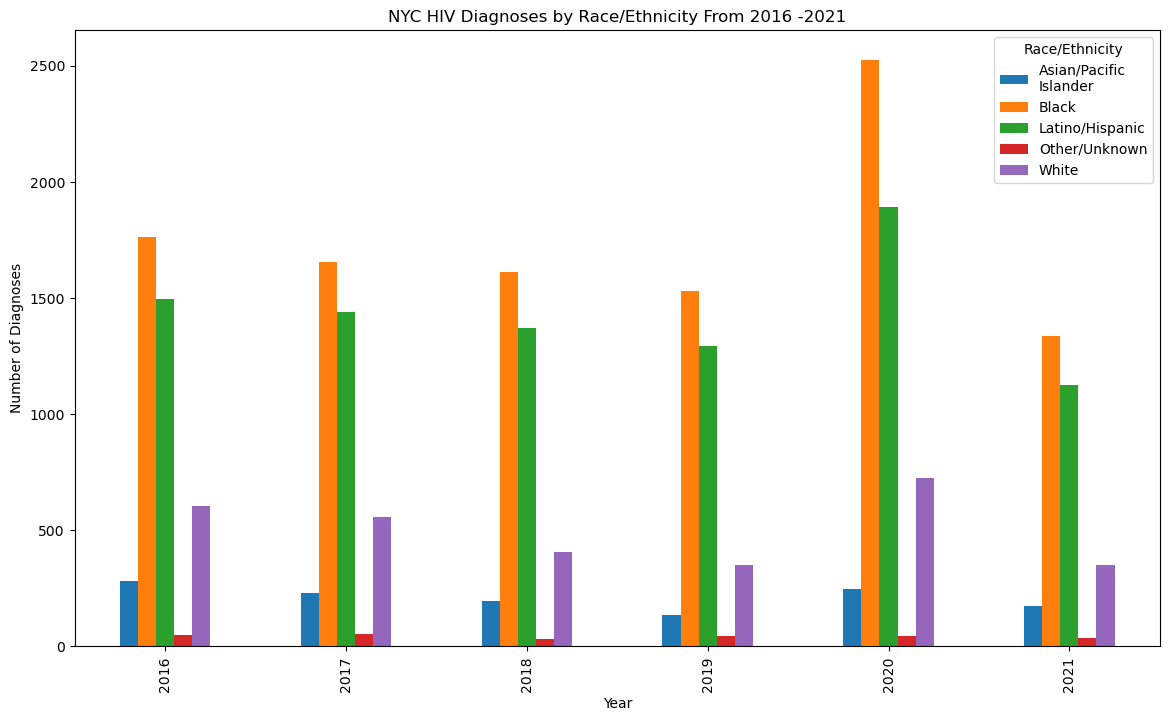

In [14]:

race_year_data = race_filter.groupby(["Year", "Race/Ethinicity"])["HIV Diagnoses"].sum().unstack().fillna(0)
race_year_data.plot(kind='bar', figsize=(14, 8))
plt.title("NYC HIV Diagnoses by Race/Ethnicity From 2016 -2021")
plt.xlabel('Year')
plt.ylabel('Number of Diagnoses')
plt.legend(title='Race/Ethnicity')

In [15]:
#Create Bronx data frame
bronx_filter = nyc["Borough"] == "Bronx"
nyc_bronx = nyc[bronx_filter]
nyc_bronx

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2946,2016,Bronx,All,All,All,489,41.5,94,19.2,337,28.6
2947,2016,Bronx,All,All,Asian/Pacific\nIslander,8,16.9,1,12.5,4,8.4
2948,2016,Bronx,All,All,Black,234,66.7,56,23.9,162,46.2
2949,2016,Bronx,All,All,Latino/Hispanic,231,35.7,36,15.6,160,24.8
2950,2016,Bronx,All,All,Other/Unknown,3,22.7,1,33.3,2,15.2
...,...,...,...,...,...,...,...,...,...,...,...
8268,2021,Bronx,Pelham - Throgs\nNeck,Male,All,40,34.0,10,25.0,27,22.9
8269,2021,Bronx,Pelham - Throgs\nNeck,Male,Asian/Pacific\nIslander,2,18.1,1,50.0,1,9.1
8270,2021,Bronx,Pelham - Throgs\nNeck,Male,Black,14,61.1,6,42.9,16,69.8
8271,2021,Bronx,Pelham - Throgs\nNeck,Male,Latino/Hispanic,20,32.3,2,10.0,9,14.6


In [16]:
nyc_bronx.describe()

,Year,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,2018.669604,32.955947,41.632452,5.801762,16.860940,24.461087,30.345521
std,1.700632,60.456823,37.663992,10.937539,17.869581,43.630622,29.766380
min,2016.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,3.000000,16.400000,0.000000,0.000000,2.000000,11.200000
50%,2019.000000,13.000000,32.000000,2.000000,15.900000,11.000000,22.200000
75%,2020.000000,36.000000,55.800000,6.000000,22.200000,26.000000,40.700000
max,2021.000000,489.000000,394.200000,94.000000,100.000000,341.000000,222.100000


In [17]:
#Analysis

In [18]:
#Diagnoses
ovr_all = nyc_bronx[(nyc_bronx['Neighborhood'] == 'All') & (nyc_bronx['Race/Ethinicity'] == 'All')& (nyc_bronx['Sex'] == 'All')]
ovr_all

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2946,2016,Bronx,All,All,All,489,41.5,94,19.2,337,28.6
3810,2017,Bronx,All,All,All,447,38.0,75,16.8,303,25.7
4674,2018,Bronx,All,All,All,425,36.2,78,18.4,341,29.1
5538,2019,Bronx,All,All,All,463,39.8,83,17.9,322,27.7
6402,2020,Bronx,All,All,All,306,26.6,47,15.4,245,21.3
7266,2020,Bronx,All,All,All,305,25.3,47,15.4,249,20.7
8130,2021,Bronx,All,All,All,371,31.6,70,18.9,296,25.2


In [19]:
HIVsum = ovr_all["HIV Diagnoses"].sum() - 305
HIVsum

2501

In [20]:
AIDSum = ovr_all["AIDS Diagnoses"].sum() - 249
AIDSum

1844

In [21]:
ccsum = ovr_all["Concurrent HIV/AIDS Diagnoses"].sum()-47
ccsum

447

In [22]:
diag_col = ["HIV Diagnoses", "AIDS Diagnoses", "Concurrent HIV/AIDS Diagnoses"]
ovr_all_long = pd.melt(ovr_all, id_vars = ["Year"], value_vars = diag_col)
ovr_all_long

,Year,variable,value
0,2016,HIV Diagnoses,489
1,2017,HIV Diagnoses,447
2,2018,HIV Diagnoses,425
3,2019,HIV Diagnoses,463
4,2020,HIV Diagnoses,306
5,2020,HIV Diagnoses,305
6,2021,HIV Diagnoses,371
7,2016,AIDS Diagnoses,337
8,2017,AIDS Diagnoses,303
9,2018,AIDS Diagnoses,341


In [23]:
PD = (371 - 489)/489 * 100
PD

-24.130879345603272

In [24]:
(371-306)/306 * 100

21.241830065359476

In [25]:
(296 - 245)/245 * 100

20.816326530612244

In [26]:
(296 - 337)/337 * 100  

-12.166172106824925

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


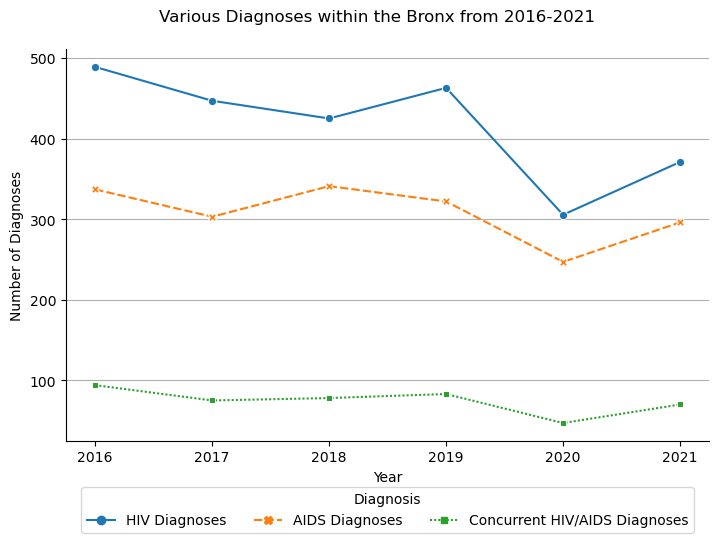

In [90]:
g = sns.relplot(x = "Year", y = "value", kind = "line", hue = "variable", style="variable", markers=True, data = ovr_all_long, aspect = 1.5)
g.fig.suptitle("Various Diagnoses within the Bronx from 2016-2021", x = 0.4, ha ="center")
g.set_axis_labels("Year", "Number of Diagnoses") 
g.set_titles("") 
g.set(xticks=ovr_all_long["Year"].unique())
g.fig.subplots_adjust(top=0.9)  
g._legend.remove() 
plt.legend(title="Diagnosis", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3) 
plt.grid(axis = "y")

Text(0, 0.5, 'Number of Concurrent Diagnoses')

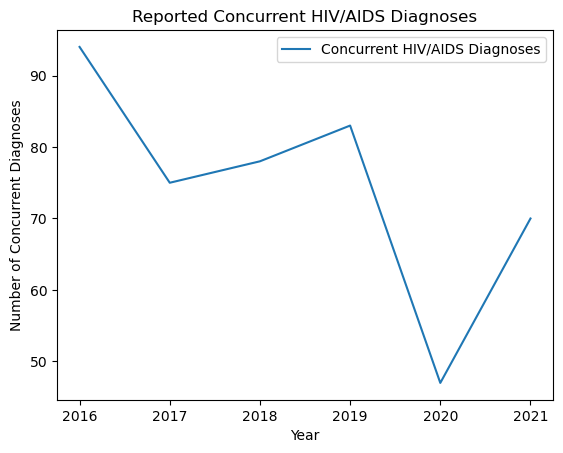

In [28]:
ovr_all.plot(x = "Year", y = "Concurrent HIV/AIDS Diagnoses")
plt.title("Reported Concurrent HIV/AIDS Diagnoses")
plt.xlabel("Year")
plt.ylabel("Number of Concurrent Diagnoses")

In [29]:
#Comparing races over the year
bx_race_filter = nyc_bronx[(nyc_bronx["Neighborhood"] == "All") & (nyc_bronx["Race/Ethinicity"] != "All") & (nyc_bronx["Sex"] == "All")]
bx_race_filter = bx_race_filter.drop([7267,7268,7269,7271])
bx_race_filter


,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2947,2016,Bronx,All,All,Asian/Pacific\nIslander,8,16.9,1,12.5,4,8.4
2948,2016,Bronx,All,All,Black,234,66.7,56,23.9,162,46.2
2949,2016,Bronx,All,All,Latino/Hispanic,231,35.7,36,15.6,160,24.8
2950,2016,Bronx,All,All,Other/Unknown,3,22.7,1,33.3,2,15.2
2951,2016,Bronx,All,All,White,13,10.8,0,0.0,9,7.5
3811,2017,Bronx,All,All,Asian/Pacific\nIslander,2,4.1,0,0.0,3,6.2
3812,2017,Bronx,All,All,Black,208,59.6,41,19.7,165,47.3
3813,2017,Bronx,All,All,Latino/Hispanic,218,33.7,31,14.2,124,19.2
3814,2017,Bronx,All,All,Other/Unknown,1,7.5,0,0.0,3,22.5
3815,2017,Bronx,All,All,White,18,15.1,3,16.7,8,6.7


In [30]:
fs2020= 4+143+141+18
fs2020

306

In [31]:
ss2020 = 4+ 140+143+18
ss2020

305

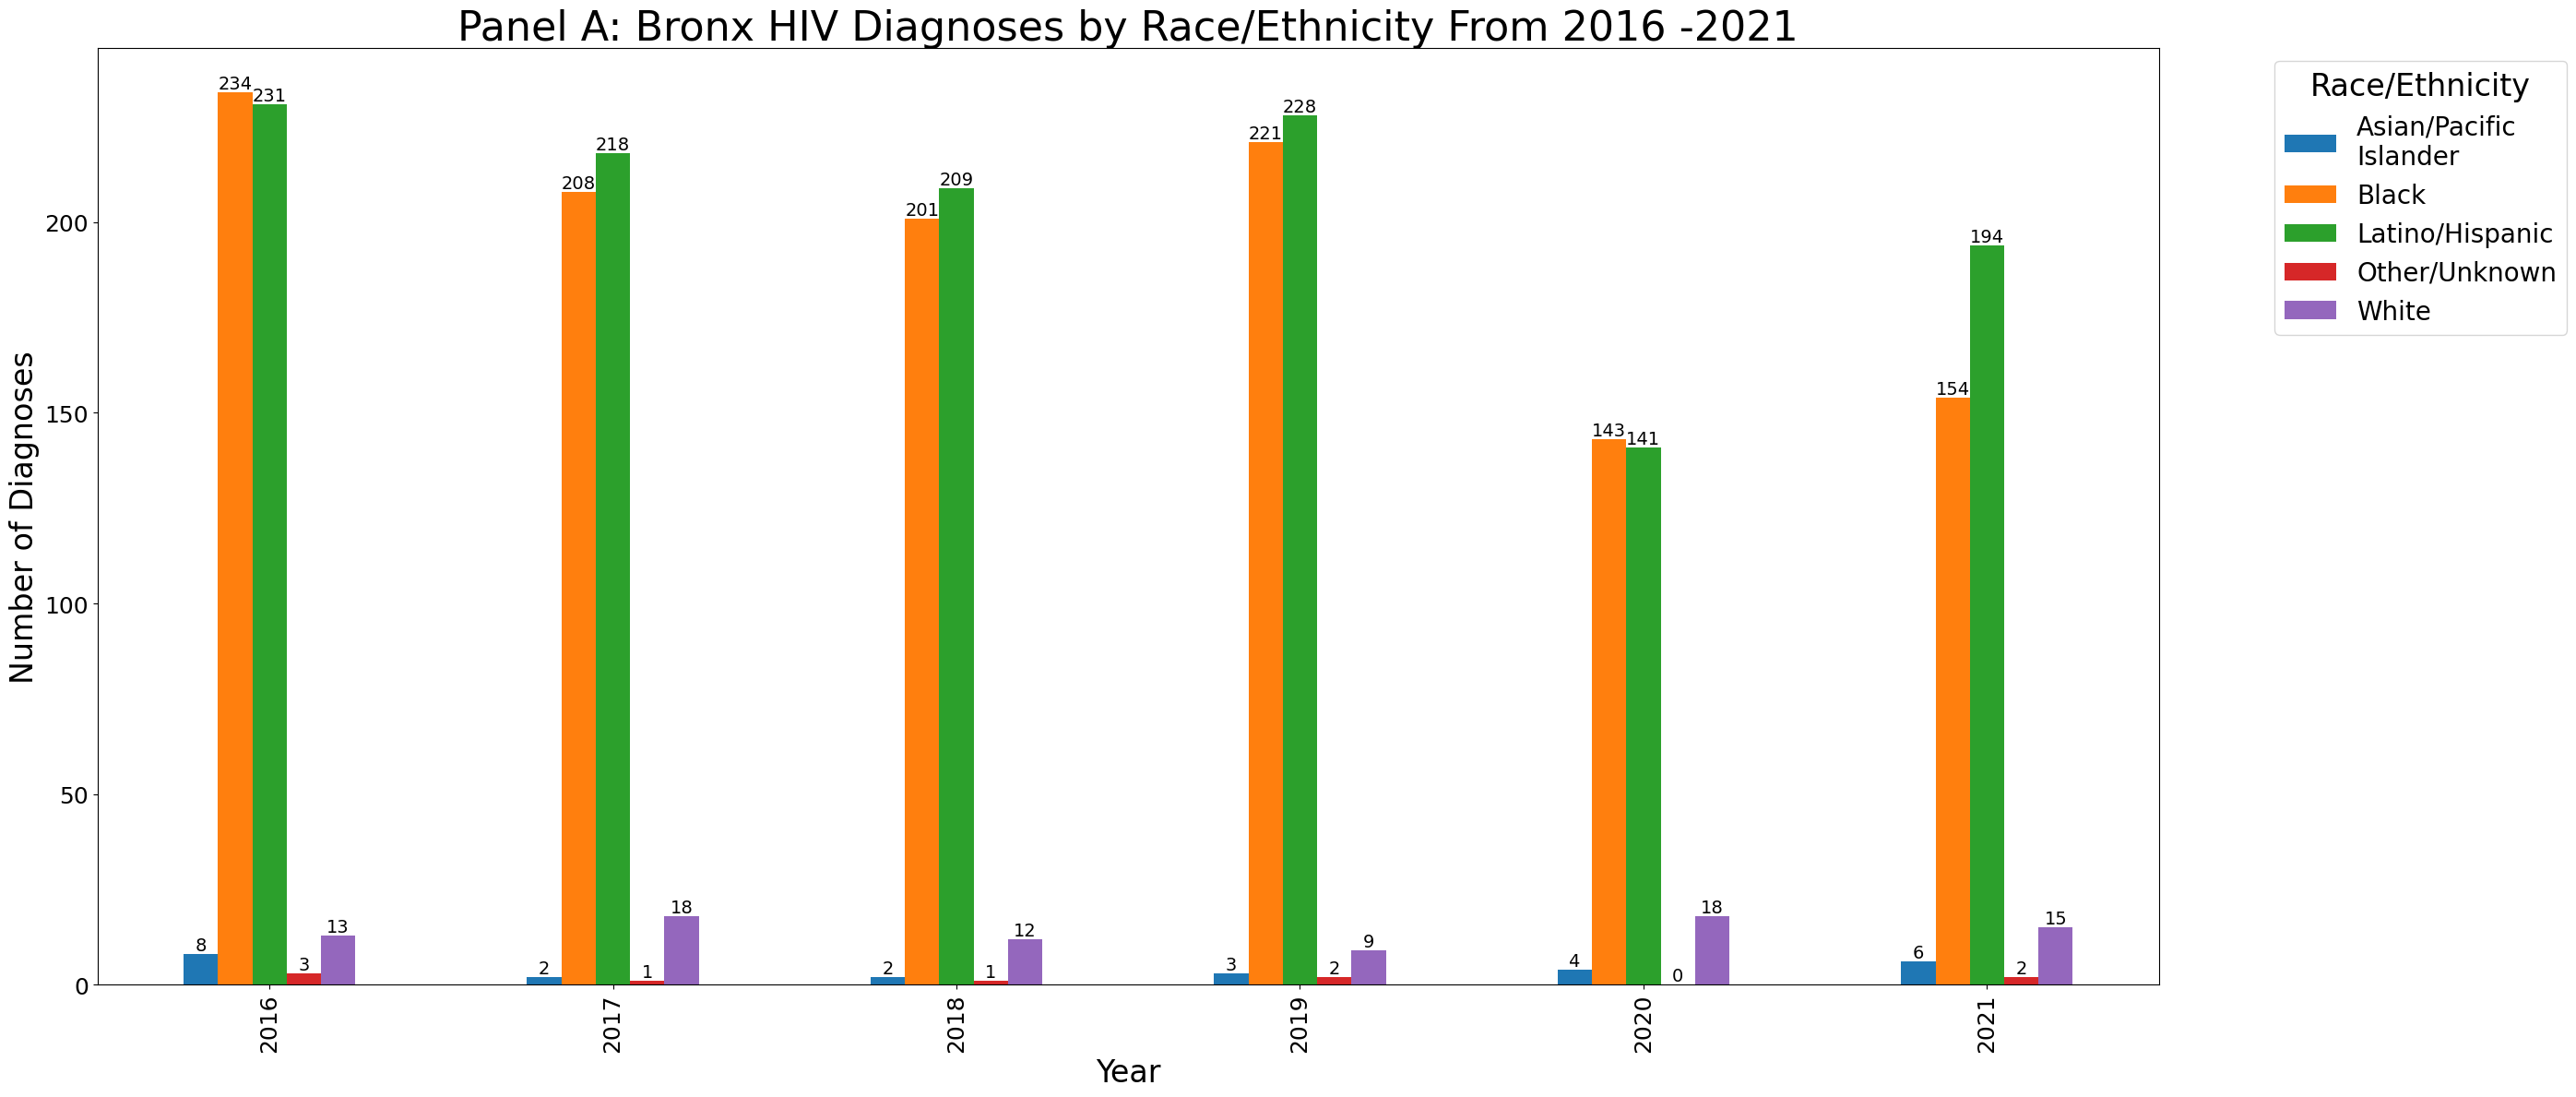

In [128]:

bx_race_year_data = bx_race_filter.groupby(["Year", "Race/Ethinicity"])["HIV Diagnoses"].sum().unstack().fillna(0)
ax = bx_race_year_data.plot(kind='bar', figsize=(28,12)) #(width, height)
plt.title("Panel A: Bronx HIV Diagnoses by Race/Ethnicity From 2016 -2021", fontsize = 32)
plt.xlabel('Year', fontsize= 24)
plt.ylabel('Number of Diagnoses', fontsize= 24)
plt.tick_params(axis='x', labelsize=18)  # Increase font size of x-axis tick labels
plt.tick_params(axis='y', labelsize=18)  # Increase font size of y-axis tick labels


plt.legend(title='Race/Ethnicity')
# Add value labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize= 14)
#move legend to the side
plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), fontsize= 20, title_fontsize=24) 
plt.tight_layout()

In [33]:
bx_race_year_data

Race/Ethinicity,Asian/Pacific\nIslander,Black,Latino/Hispanic,Other/Unknown,White
Year,,,,,
2016,8.0,234.0,231.0,3.0,13.0
2017,2.0,208.0,218.0,1.0,18.0
2018,2.0,201.0,209.0,1.0,12.0
2019,3.0,221.0,228.0,2.0,9.0
2020,4.0,143.0,141.0,0.0,18.0
2021,6.0,154.0,194.0,2.0,15.0


In [34]:
bx_race_year_data.sum()

Race/Ethinicity
Asian/Pacific\nIslander      25.0
Black                      1161.0
Latino/Hispanic            1221.0
Other/Unknown                 9.0
White                        85.0
dtype: float64

In [35]:
25 + 1161+1221+9+85

2501

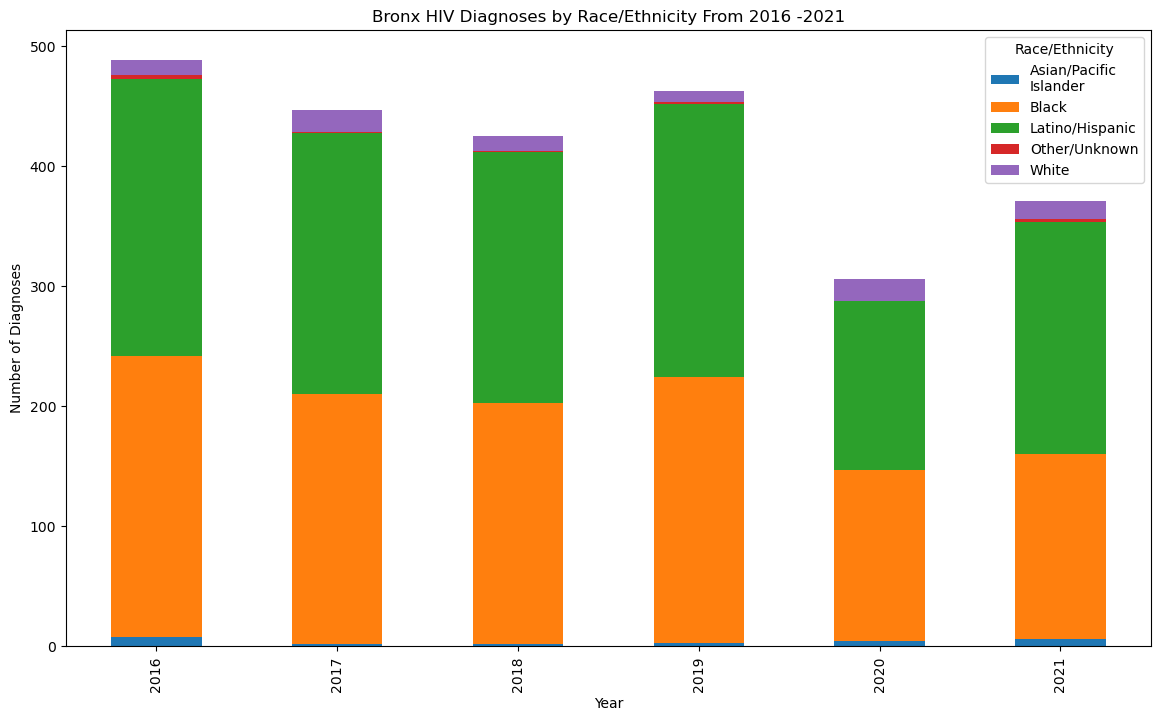

In [36]:
bx_race_year_data.plot(kind='bar',stacked=True, figsize=(14, 8))
plt.title('Bronx HIV Diagnoses by Race/Ethnicity From 2016 -2021')
plt.xlabel('Year')
plt.ylabel('Number of Diagnoses')
plt.legend(title='Race/Ethnicity')
#plt.show()

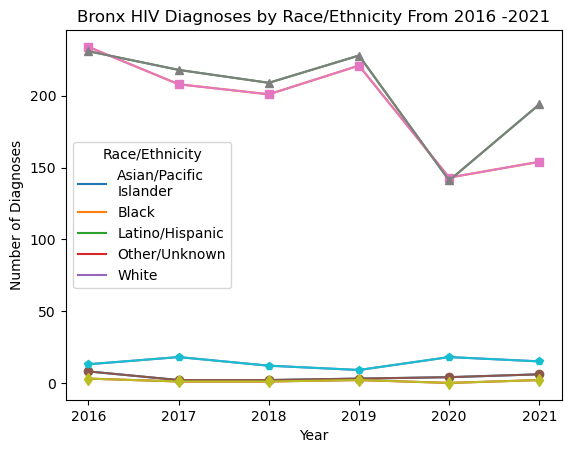

In [37]:
bx_race_year_data.plot(kind = 'line')
plt.title('Bronx HIV Diagnoses by Race/Ethnicity From 2016 -2021')
plt.xlabel('Year')
plt.ylabel('Number of Diagnoses')
plt.legend(title = 'Race/Ethnicity')

markers = ['o', 's', '^', 'd', 'p'] 
columns = bx_race_year_data.columns
for i, column in enumerate(columns):
     marker = markers[i % len(markers)] 
     bx_race_year_data[column].plot(kind='line', marker=marker, label=column)

In [38]:
black = bx_race_filter[bx_race_filter["Race/Ethinicity"] == "Black"]
hivblack_sum = black["HIV Diagnoses"].sum()
hivblack_sum

1161

In [39]:
1161/2501

0.4642143142742903

In [40]:
lh= bx_race_filter[bx_race_filter["Race/Ethinicity"] == "Latino/Hispanic"]
hiv_lh_sum = lh["HIV Diagnoses"].sum()
hiv_lh_sum

1221

In [41]:
1221/2501

0.4882047181127549

In [42]:
1161+1221

2382

In [43]:
2382/2501

0.9524190323870452

In [44]:
a_pi = bx_race_filter[bx_race_filter["Race/Ethinicity"] == "Asian/Pacific\nIslander"]
hiv_a_pi_ratio= a_pi["HIV Diagnoses"].sum()/2501
hiv_a_pi_ratio

0.009996001599360257

In [45]:
white = bx_race_filter[bx_race_filter["Race/Ethinicity"] == "White"]
hiv_white_ratio= white["HIV Diagnoses"].sum()/2501
hiv_white_ratio

0.03398640543782487

In [46]:
o_na= bx_race_filter[bx_race_filter["Race/Ethinicity"] == "Other/Unknown"]
hiv_o_na_ratio= o_na["HIV Diagnoses"].sum()/2501
hiv_o_na_ratio

0.003598560575769692

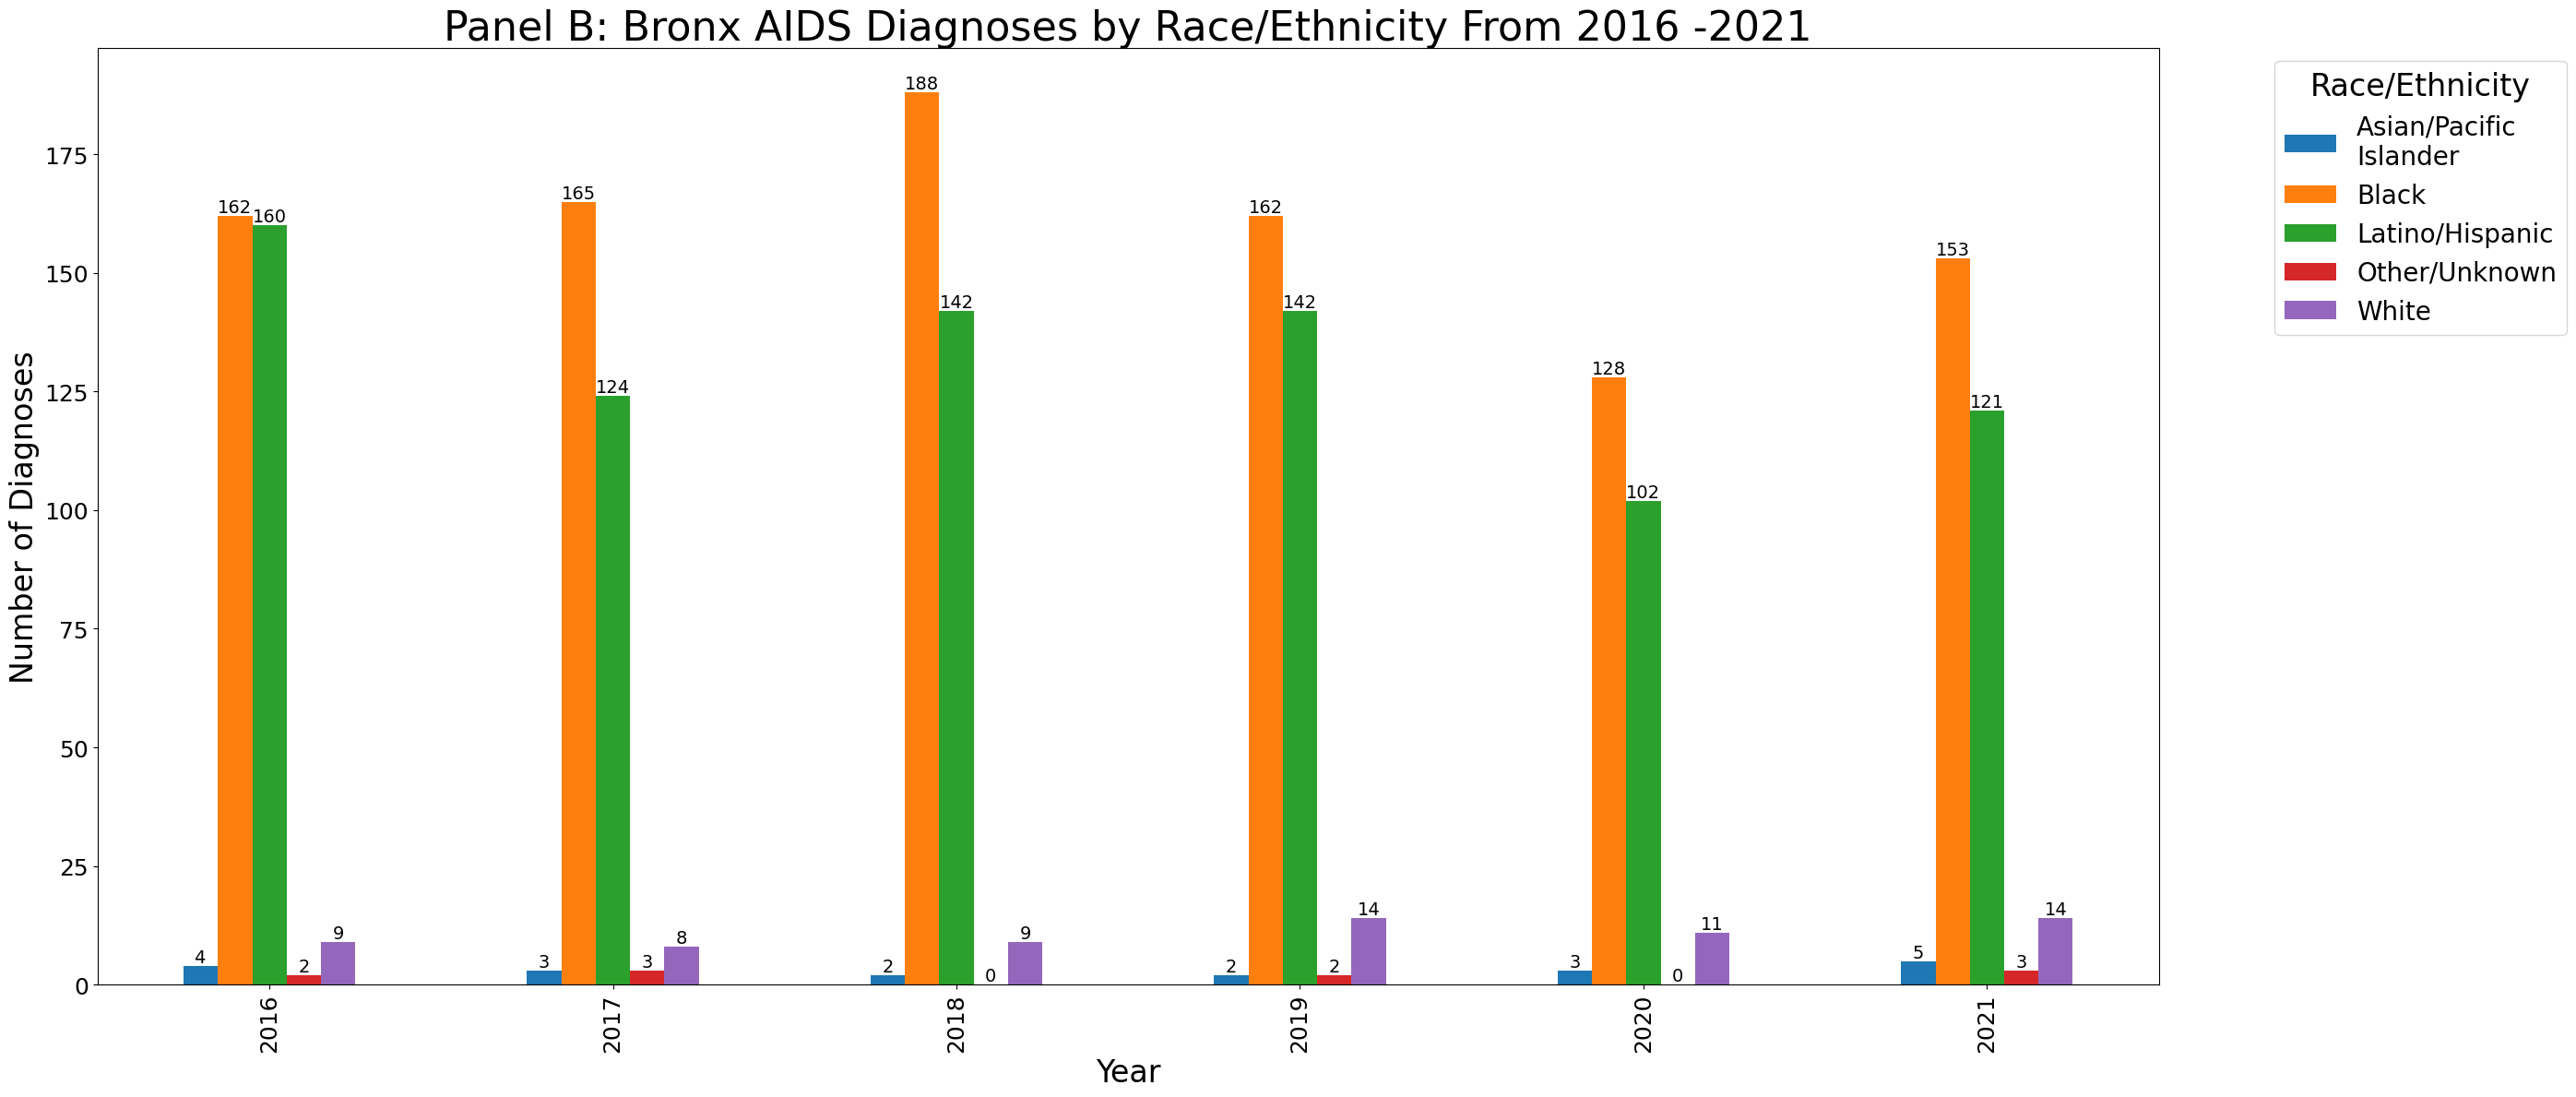

In [131]:
bx_race_year_aids = bx_race_filter.groupby(["Year", "Race/Ethinicity"])["AIDS Diagnoses"].sum().unstack().fillna(0)
ax = bx_race_year_aids.plot(kind='bar', figsize=(28,12)) 
plt.title("Panel B: Bronx AIDS Diagnoses by Race/Ethnicity From 2016 -2021", fontsize = 32)
plt.xlabel('Year', fontsize=24)
plt.ylabel('Number of Diagnoses', fontsize=24)
plt.legend(title='Race/Ethnicity')
plt.tick_params(axis='x', labelsize=18)  
plt.tick_params(axis='y', labelsize=18)

for container in ax.containers:
    ax.bar_label(container, label_type='edge',  fontsize= 14)
#move legend to the side
plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1),fontsize= 20, title_fontsize=24) 
plt.tight_layout()

In [48]:
bx_race_year_aids

Race/Ethinicity,Asian/Pacific\nIslander,Black,Latino/Hispanic,Other/Unknown,White
Year,,,,,
2016,4.0,162.0,160.0,2.0,9.0
2017,3.0,165.0,124.0,3.0,8.0
2018,2.0,188.0,142.0,0.0,9.0
2019,2.0,162.0,142.0,2.0,14.0
2020,3.0,128.0,102.0,0.0,11.0
2021,5.0,153.0,121.0,3.0,14.0


In [49]:
bx_race_year_aids.sum()

Race/Ethinicity
Asian/Pacific\nIslander     19.0
Black                      958.0
Latino/Hispanic            791.0
Other/Unknown               10.0
White                       65.0
dtype: float64

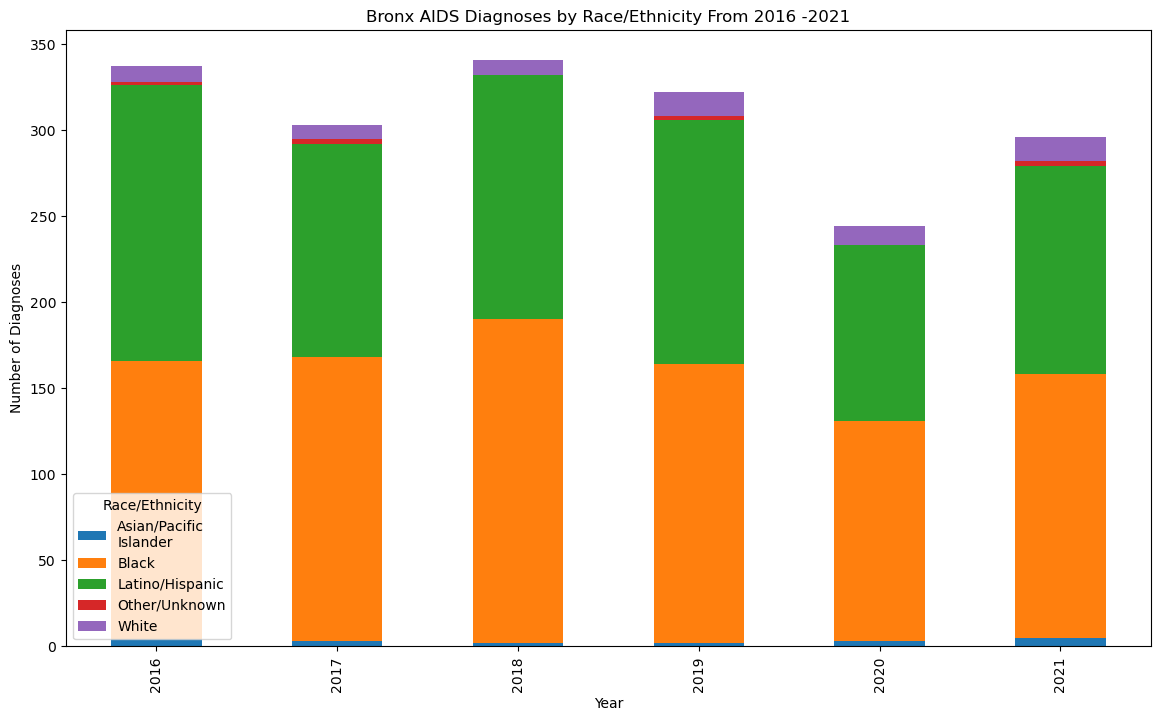

In [50]:
bx_race_year_aids.plot(kind='bar',stacked=True, figsize=(14, 8))
plt.title('Bronx AIDS Diagnoses by Race/Ethnicity From 2016 -2021')
plt.xlabel('Year')
plt.ylabel('Number of Diagnoses')
plt.legend(title='Race/Ethnicity')
#plt.show()

In [51]:
aidsblack_sum = black["AIDS Diagnoses"].sum()
aidsblack_sum

958

In [52]:
958/1844

0.5195227765726681

In [53]:
aids_lh_sum = lh["AIDS Diagnoses"].sum()
aids_lh_sum

791

In [54]:
791/1844

0.4289587852494577

In [55]:
aids_a_pi_ratio= a_pi["AIDS Diagnoses"].sum()/1844
aids_a_pi_ratio

0.010303687635574838

In [56]:
aids_white_ratio= white["AIDS Diagnoses"].sum()/1844
aids_white_ratio

0.03524945770065076

In [57]:
aids_o_na_ratio= o_na["AIDS Diagnoses"].sum()/1844
aids_o_na_ratio

0.005422993492407809

In [58]:
bx_race_filter

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2947,2016,Bronx,All,All,Asian/Pacific\nIslander,8,16.9,1,12.5,4,8.4
2948,2016,Bronx,All,All,Black,234,66.7,56,23.9,162,46.2
2949,2016,Bronx,All,All,Latino/Hispanic,231,35.7,36,15.6,160,24.8
2950,2016,Bronx,All,All,Other/Unknown,3,22.7,1,33.3,2,15.2
2951,2016,Bronx,All,All,White,13,10.8,0,0.0,9,7.5
3811,2017,Bronx,All,All,Asian/Pacific\nIslander,2,4.1,0,0.0,3,6.2
3812,2017,Bronx,All,All,Black,208,59.6,41,19.7,165,47.3
3813,2017,Bronx,All,All,Latino/Hispanic,218,33.7,31,14.2,124,19.2
3814,2017,Bronx,All,All,Other/Unknown,1,7.5,0,0.0,3,22.5
3815,2017,Bronx,All,All,White,18,15.1,3,16.7,8,6.7


In [59]:
#comparing the patients by gender

In [60]:
gender_filter = nyc_bronx[(nyc_bronx["Neighborhood"] == "All") & (nyc_bronx["Race/Ethinicity"] == "All") & (nyc_bronx["Sex"] != "All")]
gender_filter = gender_filter.drop([7272,7278])
gender_filter

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2952,2016,Bronx,All,Female,All,137,21.5,25,18.2,120,18.9
2958,2016,Bronx,All,Male,All,352,65.0,69,19.6,217,40.1
3816,2017,Bronx,All,Female,All,113,17.8,21,18.6,84,13.2
3822,2017,Bronx,All,Male,All,334,61.7,54,16.2,219,40.4
4680,2018,Bronx,All,Female,All,111,17.5,17,15.3,123,19.4
4686,2018,Bronx,All,Male,All,314,58.1,61,19.4,218,40.4
5544,2019,Bronx,All,Female,All,95,15.1,19,20.0,94,15.0
5550,2019,Bronx,All,Male,All,368,68.6,64,17.4,228,42.5
6408,2020,Bronx,All,Female,All,72,11.6,14,19.4,87,14.0
6414,2020,Bronx,All,Male,All,234,44.1,33,14.1,158,29.8


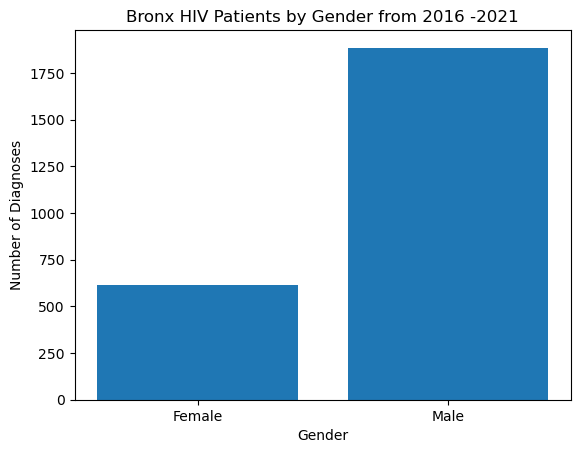

In [61]:
gender_hiv = gender_filter.groupby(["Sex"])["HIV Diagnoses"].sum().reset_index()
plt.bar(gender_hiv['Sex'], gender_hiv['HIV Diagnoses'])
plt.title('Bronx HIV Patients by Gender from 2016 -2021')
plt.xlabel('Gender')
plt.ylabel('Number of Diagnoses')
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


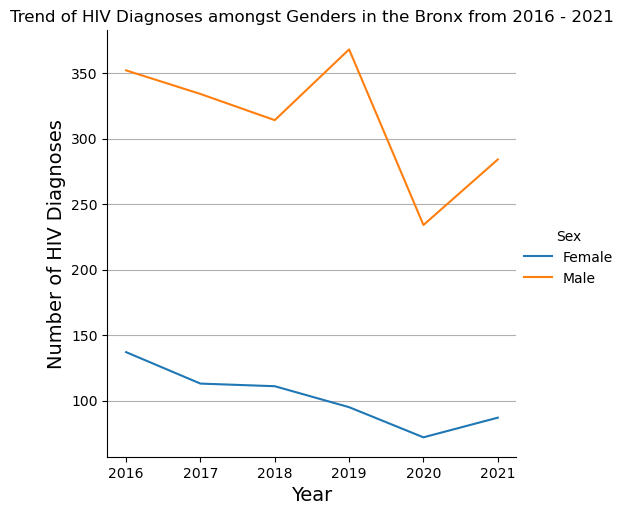

In [62]:
sns.relplot(x = "Year", y = "HIV Diagnoses", hue = "Sex", kind = "line", data = gender_filter)
plt.title("Trend of HIV Diagnoses amongst Genders in the Bronx from 2016 - 2021")
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of HIV Diagnoses', fontsize=14)
#for i in range(len(gender_filter)):
#       plt.text(gender_filter['Year'].iloc[i], gender_filter['HIV Diagnoses'].iloc[i], 
#              str(gender_filter['HIV Diagnoses'].iloc[i]), fontsize=9, ha='center')
plt.grid(axis = "y")

In [63]:
gender_hiv
#3x times more

,Sex,HIV Diagnoses
0,Female,615
1,Male,1886


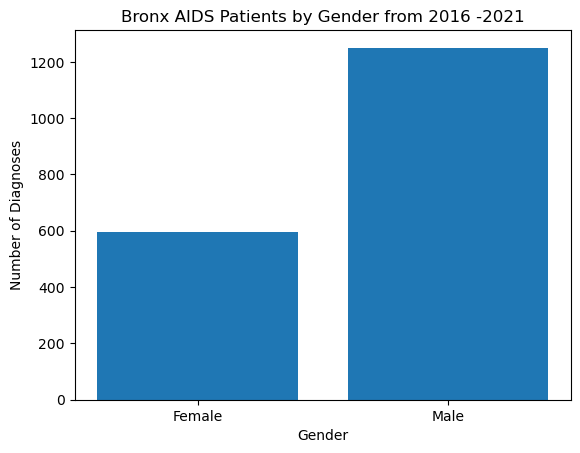

In [64]:
gender_aids = gender_filter.groupby(["Sex"])["AIDS Diagnoses"].sum().reset_index()
plt.bar(gender_aids['Sex'], gender_aids['AIDS Diagnoses'])
plt.title('Bronx AIDS Patients by Gender from 2016 -2021')
plt.xlabel('Gender')
plt.ylabel('Number of Diagnoses')
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


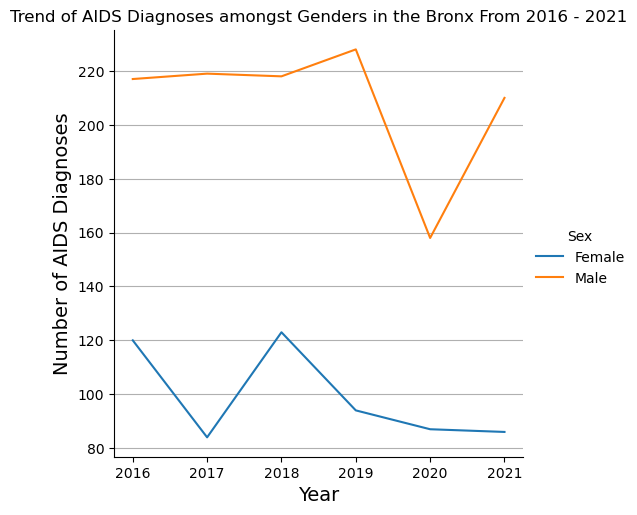

In [65]:
sns.relplot(x = "Year", y = "AIDS Diagnoses", hue = "Sex", kind = "line", data = gender_filter)
plt.title("Trend of AIDS Diagnoses amongst Genders in the Bronx From 2016 - 2021")
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of AIDS Diagnoses', fontsize=14)
plt.grid(axis = "y")
#for i in range(len(gender_filter)):
#       plt.text(gender_filter['Year'].iloc[i], gender_filter['AIDS Diagnoses'].iloc[i], 
#              str(gender_filter['AIDS Diagnoses'].iloc[i]), fontsize=9, ha='center')

In [66]:
gender_aids
#2x more likely

,Sex,AIDS Diagnoses
0,Female,594
1,Male,1250


In [67]:
1250/594

2.1043771043771042

In [68]:
#by neighborhood
hood_filter = nyc_bronx[(nyc_bronx["Neighborhood"] != "All") & (nyc_bronx["Race/Ethinicity"] == "All") & (nyc_bronx["Sex"] == "All")]
hood_filter = hood_filter.drop([6492,6510,6438,6528,6420,6456,6474])
hood_filter

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2964,2016,Bronx,Crotona - Tremont,All,All,87,50.5,16,18.4,65,37.7
2982,2016,Bronx,Fordham - Bronx\nPark,All,All,104,48.3,20,19.2,60,27.8
3000,2016,Bronx,High Bridge -\nMorrisania,All,All,94,54.2,21,22.3,80,46.1
3018,2016,Bronx,Hunts Point - Mott\nHaven,All,All,68,60.8,9,13.2,45,40.2
3036,2016,Bronx,Kingsbridge -\nRiverdale,All,All,14,17.4,1,7.1,3,3.7
3054,2016,Bronx,Northeast Bronx,All,All,48,27.6,14,29.2,39,22.4
3072,2016,Bronx,Pelham - Throgs\nNeck,All,All,74,29.6,13,17.6,45,18.0
3828,2017,Bronx,Crotona - Tremont,All,All,83,48.2,9,10.8,58,33.7
3846,2017,Bronx,Fordham - Bronx\nPark,All,All,83,38.5,13,15.7,52,24.1
3864,2017,Bronx,High Bridge -\nMorrisania,All,All,79,45.6,17,21.5,74,42.7


([0, 1, 2, 3, 4],
 [Text(0, 0, 'High Bridge -\nMorrisania'),
  Text(1, 0, 'Crotona - Tremont'),
  Text(2, 0, 'Fordham - Bronx\nPark'),
  Text(3, 0, 'Pelham - Throgs\nNeck'),
  Text(4, 0, 'Hunts Point - Mott\nHaven')])

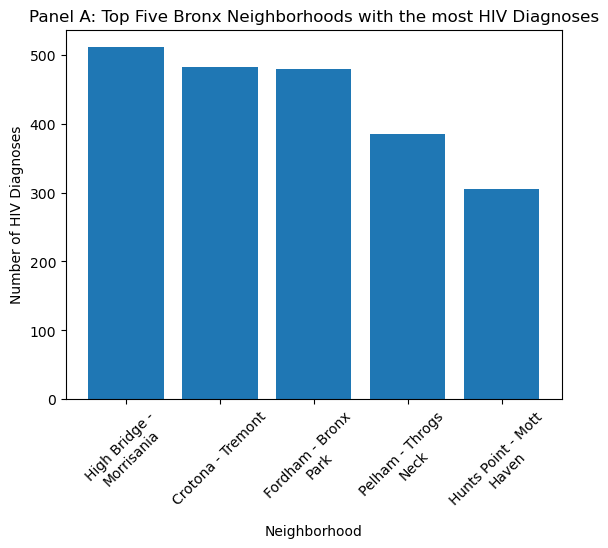

In [134]:
hiv_hood_counts = hood_filter.groupby(["Neighborhood"])["HIV Diagnoses"].sum().reset_index()
top_hiv_hoods = hiv_hood_counts.sort_values("HIV Diagnoses", ascending = False).head(5)
plt.bar(top_hiv_hoods["Neighborhood"], top_hiv_hoods ["HIV Diagnoses"])
plt.title("Panel A: Top Five Bronx Neighborhoods with the most HIV Diagnoses")
plt.xlabel('Neighborhood')
plt.ylabel('Number of HIV Diagnoses')
plt.xticks(rotation = 45)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


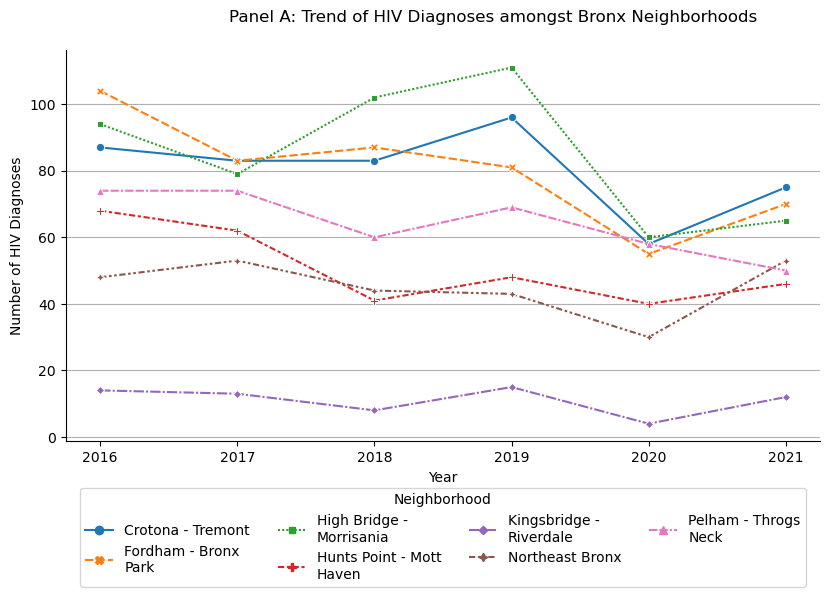

In [137]:
g = sns.relplot(x = "Year", y = "HIV Diagnoses", hue = "Neighborhood", kind = "line",style ="Neighborhood", markers = True, data = hood_filter, aspect = 1.7)
g.fig.suptitle("Panel A: Trend of HIV Diagnoses amongst Bronx Neighborhoods")
g.set_axis_labels("Year", "Number of HIV Diagnoses") 
g.set_titles("") 
g.set(xticks= hood_filter["Year"].unique())
g.fig.subplots_adjust(top=0.9)  
g._legend.remove() 
plt.legend(title="Neighborhood", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol= 4)
plt.grid(axis = "y")


In [71]:
hiv_hood_counts

,Neighborhood,HIV Diagnoses
0,Crotona - Tremont,482
1,Fordham - Bronx\nPark,480
2,High Bridge -\nMorrisania,511
3,Hunts Point - Mott\nHaven,305
4,Kingsbridge -\nRiverdale,66
5,Northeast Bronx,271
6,Pelham - Throgs\nNeck,385


In [72]:
hood_filter.groupby("Neighborhood")["HIV Diagnoses"].mean().reset_index()

,Neighborhood,HIV Diagnoses
0,Crotona - Tremont,80.333333
1,Fordham - Bronx\nPark,80.000000
2,High Bridge -\nMorrisania,85.166667
3,Hunts Point - Mott\nHaven,50.833333
4,Kingsbridge -\nRiverdale,11.000000
5,Northeast Bronx,45.166667
6,Pelham - Throgs\nNeck,64.166667


([0, 1, 2, 3, 4],
 [Text(0, 0, 'High Bridge -\nMorrisania'),
  Text(1, 0, 'Crotona - Tremont'),
  Text(2, 0, 'Fordham - Bronx\nPark'),
  Text(3, 0, 'Pelham - Throgs\nNeck'),
  Text(4, 0, 'Hunts Point - Mott\nHaven')])

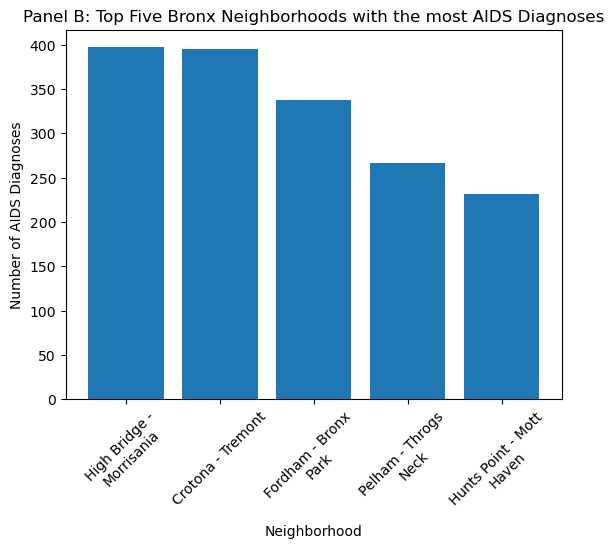

In [135]:
aids_hood_counts = hood_filter.groupby(["Neighborhood"])["AIDS Diagnoses"].sum().reset_index()
top_aids_hood = aids_hood_counts.sort_values("AIDS Diagnoses", ascending = False).head(5)
plt.bar(top_aids_hood["Neighborhood"], top_aids_hood ["AIDS Diagnoses"])
plt.title("Panel B: Top Five Bronx Neighborhoods with the most AIDS Diagnoses")
plt.xlabel('Neighborhood')
plt.ylabel('Number of AIDS Diagnoses')
plt.xticks(rotation = 45)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


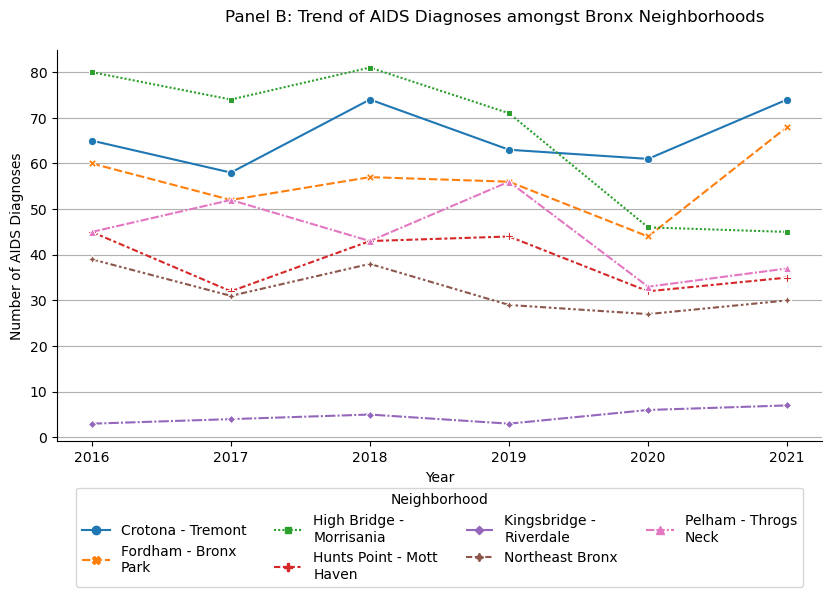

In [138]:
g = sns.relplot(x = "Year", y = "AIDS Diagnoses", hue = "Neighborhood", kind = "line",style ="Neighborhood", markers = True, data = hood_filter, aspect = 1.7)
g.fig.suptitle("Panel B: Trend of AIDS Diagnoses amongst Bronx Neighborhoods")
g.set_axis_labels("Year", "Number of AIDS Diagnoses") 
g.set_titles("") 
g.set(xticks= hood_filter["Year"].unique())
g.fig.subplots_adjust(top=0.9)  
g._legend.remove() 
plt.legend(title="Neighborhood", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol= 4)
plt.grid(axis = "y")

In [75]:
aids_hood_counts

,Neighborhood,AIDS Diagnoses
0,Crotona - Tremont,395
1,Fordham - Bronx\nPark,337
2,High Bridge -\nMorrisania,397
3,Hunts Point - Mott\nHaven,231
4,Kingsbridge -\nRiverdale,28
5,Northeast Bronx,194
6,Pelham - Throgs\nNeck,266


In [76]:
hood_filter.groupby("Neighborhood")["AIDS Diagnoses"].mean().reset_index()

,Neighborhood,AIDS Diagnoses
0,Crotona - Tremont,65.833333
1,Fordham - Bronx\nPark,56.166667
2,High Bridge -\nMorrisania,66.166667
3,Hunts Point - Mott\nHaven,38.500000
4,Kingsbridge -\nRiverdale,4.666667
5,Northeast Bronx,32.333333
6,Pelham - Throgs\nNeck,44.333333


In [77]:
#2021 Bronx
bx_2021 = hood_filter[hood_filter["Year"] == 2021]
bx_2021

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
8148,2021,Bronx,Crotona - Tremont,All,All,75,44.3,12,16.0,74,43.7
8166,2021,Bronx,Fordham - Bronx\nPark,All,All,70,32.4,16,22.9,68,31.5
8184,2021,Bronx,High Bridge -\nMorrisania,All,All,65,37.5,16,24.6,45,25.9
8202,2021,Bronx,Hunts Point - Mott\nHaven,All,All,46,41.3,4,8.7,35,31.4
8220,2021,Bronx,Kingsbridge -\nRiverdale,All,All,12,15.2,1,8.3,7,8.9
8238,2021,Bronx,Northeast Bronx,All,All,53,30.2,9,17.0,30,17.1
8256,2021,Bronx,Pelham - Throgs\nNeck,All,All,50,19.9,12,24.0,37,14.7


In [78]:
pip install pandas geopandas matplotlib


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [79]:
#heatmap
import geopandas as gpd

heatmap_2021 = bx_2021.pivot(index = "Borough", columns = "Year", values = "HIV Diagnoses")

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
3+11+6+1+4

In [ ]:
3+11+7+2+4